<a href="https://colab.research.google.com/github/AzlinRusnan/Sleep_Quality_Analysis/blob/main/Sleep_Duration_vs_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

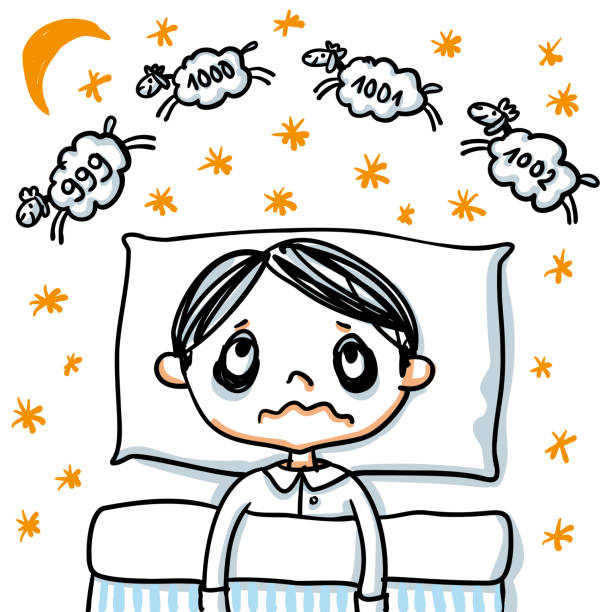

## **Data Description**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

file_path = '/content/gdrive/MyDrive/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


##### **Columns Explanation:**

1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

##### **Details about Sleep Disorder Column:**

1. None: The individual does not exhibit any specific sleep disorder.
2. Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
3. Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

##### **Checking the Columns Names**

##### **Checking the Total Number of Missing Values**

In [ ]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


**Note:**
The **Sleep Disorder** variable has incorrectly captured 219 missing values. In the raw data, these missing values are labeled as 'None'. To fix this, we replace "NaN" with "None".

In [ ]:
df['Sleep Disorder'].fillna("None",inplace=True)

print(df['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [ ]:
# Total No. of Missing Values after NaN replacement
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values after NaN replacement"})

,Total No. of Missing Values after NaN replacement
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


##### **Standardize Categories**

1. To standardize the "BMI Category" so that both "Normal" and "Normal Weight" are categorized as "Normal".
2. To standardize the "Occupation" so that both "Sales Representative" and "Salesperson" are categorized as "Salesperson".

In [ ]:
df['Occupation'].replace({'Sales Representative': 'Salesperson'}, inplace=True)
df['BMI Category'].replace({'Normal Weight','Normal'}, inplace=True)

##### **Define occupation groups**

Since there are many different occupations listed, we standardized them by grouping similar occupations together.

In [ ]:
occupation_mapping = {
    'Doctor': 'Healthcare',
    'Nurse': 'Healthcare',
    'Software Engineer': 'Engineering/IT',
    'Engineer': 'Engineering/IT',
    'Scientist': 'Engineering/IT',
    'Teacher': 'Education',
    'Salesperson': 'Sales',
    'Lawyer': 'Legal',
    'Manager': 'Management'
}

# Apply the occupation mapping
df['Occupation'] = df['Occupation'].map(occupation_mapping)

##### **Define Blood Pressure to MAP**

Since there are many different blood pressure values, we standardized them by calculating the Mean Arterial Pressure (MAP) for easier grouping and analysis.

In [ ]:
def calculate_map(bp):
    try:
        systolic, diastolic = map(int, bp.split('/'))
        return (systolic + 2 * diastolic) / 3
    except:
        return None  # Return None if there's an issue with format

# Calculate MAP for blood pressure
df['MAP'] = df['Blood Pressure'].apply(calculate_map)

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'MAP'],
      dtype='object')

In [ ]:
# Drop unnecessary columns and encode categorical variables

df = df.drop(['Person ID', 'Blood Pressure'], axis=1)

df = pd.get_dummies(df, drop_first=True)

# Convert all boolean columns to integer (1 for True, 0 for False)
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,MAP,Gender_Male,Occupation_Engineering/IT,Occupation_Healthcare,Occupation_Legal,Occupation_Management,Occupation_Sales,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,97.333333,1,1,0,0,0,0,0,0,1,1,0
1,28,6.2,6,60,8,75,10000,95.000000,1,0,1,0,0,0,0,0,0,1,0
2,28,6.2,6,60,8,75,10000,95.000000,1,0,1,0,0,0,0,0,0,1,0
3,28,5.9,4,30,8,85,3000,106.666667,1,0,0,0,0,1,0,1,0,0,1
4,28,5.9,4,30,8,85,3000,106.666667,1,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,110.000000,0,0,1,0,0,0,0,0,1,0,1
370,59,8.0,9,75,3,68,7000,110.000000,0,0,1,0,0,0,0,0,1,0,1
371,59,8.1,9,75,3,68,7000,110.000000,0,0,1,0,0,0,0,0,1,0,1
372,59,8.1,9,75,3,68,7000,110.000000,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         374 non-null    int64  
 1   Sleep Duration              374 non-null    float64
 2   Quality of Sleep            374 non-null    int64  
 3   Physical Activity Level     374 non-null    int64  
 4   Stress Level                374 non-null    int64  
 5   Heart Rate                  374 non-null    int64  
 6   Daily Steps                 374 non-null    int64  
 7   MAP                         374 non-null    float64
 8   Gender_Male                 374 non-null    int64  
 9   Occupation_Engineering/IT   374 non-null    int64  
 10  Occupation_Healthcare       374 non-null    int64  
 11  Occupation_Legal            374 non-null    int64  
 12  Occupation_Management       374 non-null    int64  
 13  Occupation_Sales            374 non

#### **Target Variable**

The target variable (dependent variable) should be continuous, so I chose Sleep Duration over Quality of Sleep as the target. This is because Quality of Sleep is rated on a 1–10 discrete ordinal scale, which may be better suited for ordinal regression.

## **The Models**

### **Multiple Linear Regression Model**

Multiple linear regression is a way to predict something by looking at how multiple factors (variables) affect it. For example, if we want to predict a person’s weight, we might look at several factors like their height, age, and level of physical activity. In multiple linear regression, we use these factors together to make a more accurate prediction than if we looked at just one factor alone.

Essentially, it’s a method to understand and quantify how different factors combine to impact a particular outcome.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = df.drop(columns=['Sleep Duration'])
y = df['Sleep Duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Add a constant to the independent variables matrix for the intercept term
X_const = add_constant(X)

# Fit the Multiple Linear Regression model
model = sm.OLS(y, X_const).fit()

# Display the summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Duration   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     151.9
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.79e-154
Time:                        01:13:06   Log-Likelihood:                -40.062
No. Observations:                 374   AIC:                             118.1
Df Residuals:                     355   BIC:                             192.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.5284      1.119      7.623      0.000       6.328      10.729
Age                            0.0149      0.006      2.561      0.011       0.003       0.026
Quality of Sleep               0.2077      0.058      3.564      0.000       0.093       0.322
Physical Activity Level        0.0088      0.002      5.132      0.000       0.005       0.012
Stress Level                  -0.2355      0.036     -6.590      0.000      -0.306      -0.165
Heart Rate                     0.0062      0.011      0.591      0.555      -0.015       0.027
Daily Steps                -6.043e-05   2.18e-05     -2.774      0.006      -0.000   -1.76e-05
MAP                           -0.0319      0.007     -4.849      0.000      -0.045      -0.019
Gender_Male                    0.1652      0.072      2.287      0.023       0.023       0.307
Occupation_Engineering/IT      0.5221      0.077      6.752      0.000       0.370       0.674
Occupation_Healthcare          0.5773      0.069      8.365      0.000       0.442       0.713
Occupation_Legal               0.4166      0.096      4.328      0.000       0.227       0.606
Occupation_Management          0.1453      0.288      0.504      0.614      -0.421       0.712
Occupation_Sales               0.3444      0.094      3.645      0.000       0.159       0.530
BMI Category_Normal Weight    -0.0219      0.069     -0.319      0.750      -0.157       0.113
BMI Category_Obese            -0.0857      0.196     -0.437      0.662      -0.471       0.299
BMI Category_Overweight       -0.1375      0.090     -1.528      0.127      -0.314       0.039
Sleep Disorder_None           -0.1296      0.064     -2.031      0.043      -0.255      -0.004
Sleep Disorder_Sleep Apnea    -0.0481      0.068     -0.708      0.479      -0.182       0.086
==============================================================================
Omnibus:                       15.812   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.951
Skew:                           0.426   Prob(JB):                     0.000126
Kurtosis:                       3.652   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **Insights:**

This model explains 88.5% of the variation in sleep duration, with most factors significantly influencing it, while a few, like Heart Rate and certain BMI categories, show little to no impact.

In [ ]:
# Calculate VIF for each features
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Variable,VIF
0,const,6124.897272
2,Quality of Sleep,23.752587
4,Stress Level,19.628589
1,Age,12.431527
16,BMI Category_Overweight,9.475790
7,MAP,9.345344
5,Heart Rate,9.343157
8,Gender_Male,6.387383
3,Physical Activity Level,6.256275
6,Daily Steps,6.064580


##### **Insights:**

Quality of Sleep and Stress Level have very high VIFs (23.75 and 19.63 respectively), indicating multicollinearity. This suggests that these predictors are highly correlated with other features.

**Plan:**

We will remove one of the highly correlated variables (Quality of Sleep, Stress Level, or Age) to reduce multicollinearity.

In [ ]:
# Drop statistically insignificant variables that has high p-value and high VIF (Stress Level)
X_reduced = X_const.drop(columns=['Stress Level'])

# Fit the model with reduced features
model_reduced = sm.OLS(y, X_reduced).fit()
model_reduced_summary = model_reduced.summary()

# Recalculate VIF for the reduced model
vif_reduced_data = pd.DataFrame()
vif_reduced_data["Variable"] = X_reduced.columns
vif_reduced_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Display the reduced model summary and updated VIFs
model_reduced_summary, vif_reduced_data.sort_values(by="VIF", ascending=False)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         Sleep Duration   R-squared:                       0.871
 Model:                            OLS   Adj. R-squared:                  0.865
 Method:                 Least Squares   F-statistic:                     141.5
 Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.03e-146
 Time:                        01:13:17   Log-Likelihood:                -61.646
 No. Observations:                 374   AIC:                             159.3
 Df Residuals:                     356   BIC:                             229.9
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------

##### **Insights:**

The VIF value, have improved a lot compared to before. We will now remove **Quality of Sleep**.

In [ ]:
# Drop 'Quality of Sleep'
X_reduced_2 = X_reduced.drop(columns=['Quality of Sleep'])

# Fit the model with reduced features after removing 'Quality of Sleep'
model_reduced_2 = sm.OLS(y, X_reduced_2).fit()
model_reduced_2_summary = model_reduced_2.summary()

# Recalculate VIF for the further reduced model
vif_reduced_data_2 = pd.DataFrame()
vif_reduced_data_2["Variable"] = X_reduced_2.columns
vif_reduced_data_2["VIF"] = [variance_inflation_factor(X_reduced_2.values, i) for i in range(X_reduced_2.shape[1])]

# Display the further reduced model summary and updated VIFs after removing 'Quality of Sleep'
model_reduced_2_summary, vif_reduced_data_2.sort_values(by="VIF", ascending=False)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         Sleep Duration   R-squared:                       0.811
 Model:                            OLS   Adj. R-squared:                  0.802
 Method:                 Least Squares   F-statistic:                     95.65
 Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.53e-118
 Time:                        01:13:25   Log-Likelihood:                -133.30
 No. Observations:                 374   AIC:                             300.6
 Df Residuals:                     357   BIC:                             367.3
 Df Model:                          16                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------

##### **Insights:**

- After removing **Quality of Sleep**, the VIFs have generally improved. Although a VIF below 5 indicates low multicollinearity, VIF values between 5 and 10 suggest moderate multicollinearity, which may be acceptable.

**Plan:**

I decided not to remove any more variables, as I’m concerned that it might limit the ability to gain insights into sleep health.

### **Variable Selection**

I use **forward selection**, **backward elimination**, and **stepwise selection** to help us choose the best set of variables (predictors) for building a Multiple Linear Regression (MLR) model. The goal is to find a model that is simple, accurate, and doesn’t include unnecessary variables.

Here’s why each method is used:

1. **Forward Selection**: This method starts with no variables in the model and adds one variable at a time. At each step, it pick the variable that improves the model the most. This helps to avoid adding too many irrelevant variables from the start and focuses on the important ones.

2. **Backward Elimination**: In this method, it start with all variables in the model and then remove the least useful one at a time. If a variable does not improve the model, it is eliminated. This helps to simplify the model by keeping only relevant variables.

3. **Stepwise Selection**: This method is a mix of both forward selection and backward elimination. It starts with an empty model or a full model and both adds and removes variables at each step. It’s a good balance because it looks at all possibilities and adjusts the model to include only the best variables.

In [ ]:
# Variable selection to find the best MLR model for the data

def forward_selection(X, y, significance_level=0.05):
    """Performs forward selection to select variables for a regression model."""
    initial_features = []
    best_features = list(X.columns)

    while best_features:
        remaining_features = list(set(X.columns) - set(initial_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)

        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            initial_features.append(best_feature)
        else:
            break

    return initial_features

def backward_elimination(X, y, significance_level=0.05):
    """Performs backward elimination to select variables for a regression model."""
    features = list(X.columns)

    while features:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues[1:]  # Exclude intercept
        max_p_value = p_values.max()

        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

def stepwise_selection(X, y, significance_level_in=0.05, significance_level_out=0.05):
    """Performs stepwise selection to select variables for a regression model."""
    included = []

    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # Backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        p_values = model.pvalues[1:]  # Exclude intercept
        max_p_value = p_values.max()

        if max_p_value > significance_level_out:
            worst_feature = p_values.idxmax()
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    return included

# Function to fit model and calculate R-squared and MSE
def evaluate_model(features, X, y):
    X_eval = sm.add_constant(X[features])
    model = sm.OLS(y, X_eval).fit()
    y_pred = model.predict(X_eval)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

# Apply variable selection methods
selected_features_forward = forward_selection(X_reduced_2, y)
selected_features_backward = backward_elimination(X_reduced_2, y)
selected_features_stepwise = stepwise_selection(X_reduced_2, y)

# Evaluate models with selected features from each method
results = {
    "Forward Selection": evaluate_model(selected_features_forward, X_reduced_2, y),
    "Backward Elimination": evaluate_model(selected_features_backward, X_reduced_2, y),
    "Stepwise Selection": evaluate_model(selected_features_stepwise, X_reduced_2, y)
}

# Prepare a structured result to include R2, MSE, and selected variables
detailed_results = {
    "Forward Selection": {
        "R2": results["Forward Selection"][0],
        "MSE": results["Forward Selection"][1],
        "Variables": selected_features_forward
    },
    "Backward Elimination": {
        "R2": results["Backward Elimination"][0],
        "MSE": results["Backward Elimination"][1],
        "Variables": selected_features_backward
    },
    "Stepwise Selection": {
        "R2": results["Stepwise Selection"][0],
        "MSE": results["Stepwise Selection"][1],
        "Variables": selected_features_stepwise
    }
}


for method, metrics in detailed_results.items():
    print(f"{method} Results:")
    print(f"  R2: {metrics['R2']}")
    print(f"  MSE: {metrics['MSE']}")
    print("  Selected Variables:")
    for var in metrics['Variables']:
        print(f"    {var}")  # Each variable is printed on a new line
    print("\n")


Forward Selection Results:
  R2: 0.8088699418631868
  MSE: 0.12067511007408294
  Selected Variables:
    const
    Heart Rate
    BMI Category_Obese
    Physical Activity Level
    Occupation_Engineering/IT
    Daily Steps
    BMI Category_Overweight
    Age
    MAP
    Occupation_Healthcare
    Occupation_Legal
    Sleep Disorder_Sleep Apnea
    Occupation_Sales


Backward Elimination Results:
  R2: 0.8085801683365061
  MSE: 0.12085806639487119
  Selected Variables:
    const
    Age
    Physical Activity Level
    Heart Rate
    Daily Steps
    MAP
    Occupation_Engineering/IT
    Occupation_Healthcare
    Occupation_Legal
    Occupation_Sales
    BMI Category_Obese
    Sleep Disorder_Sleep Apnea


Stepwise Selection Results:
  R2: 0.8085801683365066
  MSE: 0.12085806639487084
  Selected Variables:
    const
    Heart Rate
    Physical Activity Level
    Occupation_Engineering/IT
    Daily Steps
    Age
    MAP
    Occupation_Healthcare
    Occupation_Legal
    BMI Category_Obese
  

##### **Insights:**

- Each method offers a similar subset of features, with slight variations. At first, We are selecting the subset from Forward Selection as it have higher R2. However, in Forward Selection, 1 variable (BMI Category_Overweight) showing high p-value. Below is the prove.

- We then proceed, selecting the subset from stepwise selection as it combines both forward and backward methods.

In [ ]:
# FWD

X_final = X_reduced_2[
    ['Heart Rate', 'BMI Category_Obese', 'Physical Activity Level', 'Occupation_Engineering/IT', 'Daily Steps',
     'BMI Category_Overweight', 'Age', 'MAP', 'Occupation_Healthcare', 'Occupation_Legal', 'Sleep Disorder_Sleep Apnea', 'Occupation_Sales']]
X_final_const = add_constant(X_final)

# Fit the final model
model_final = sm.OLS(y, X_final_const).fit()
model_final_summary = model_final.summary()


model_final_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Duration   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     127.3
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.15e-121
Time:                        01:31:12   Log-Likelihood:                -135.24
No. Observations:                 374   AIC:                             296.5
Df Residuals:                     361   BIC:                             347.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.3391      0.898     21.533      0.000      17.573      21.105
Heart Rate                    -0.1132      0.008    -14.645      0.000      -0.128      -0.098
BMI Category_Obese             1.1780      0.207      5.697      0.000       0.771       1.585
Physical Activity Level        0.0254      0.002     15.691      0.000       0.022       0.029
Occupation_Engineering/IT      0.6619      0.077      8.640      0.000       0.511       0.813
Daily Steps                   -0.0002   2.21e-05    -11.178      0.000      -0.000      -0.000
BMI Category_Overweight       -0.0767      0.104     -0.740      0.460      -0.281       0.127
Age                            0.0376      0.004     10.313      0.000       0.030       0.045
MAP                           -0.0622      0.007     -8.589      0.000      -0.076      -0.048
Occupation_Healthcare          0.5787      0.071      8.101      0.000       0.438       0.719
Occupation_Legal               0.7344      0.096      7.686      0.000       0.546       0.922
Sleep Disorder_Sleep Apnea     0.2095      0.071      2.941      0.003       0.069       0.350
Occupation_Sales               0.2141      0.081      2.639      0.009       0.055       0.374
==============================================================================
Omnibus:                        8.724   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.470
Skew:                          -0.241   Prob(JB):                      0.00533
Kurtosis:                       3.662   Cond. No.                     3.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#BWD

X_final = X_reduced_2[
    ['Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'MAP',
     'Occupation_Engineering/IT', 'Occupation_Healthcare', 'Occupation_Legal', 'Occupation_Sales', 'BMI Category_Obese', 'Sleep Disorder_Sleep Apnea']]
X_final_const = add_constant(X_final)

# Fit the final model
model_final = sm.OLS(y, X_final_const).fit()
model_final_summary = model_final.summary()


model_final_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Duration   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.25e-122
Time:                        01:32:09   Log-Likelihood:                -135.53
No. Observations:                 374   AIC:                             295.1
Df Residuals:                     362   BIC:                             342.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.8341      0.599     33.128      0.000      18.657      21.012
Age                            0.0371      0.004     10.395      0.000       0.030       0.044
Physical Activity Level        0.0254      0.002     15.766      0.000       0.022       0.029
Heart Rate                    -0.1152      0.007    -15.841      0.000      -0.129      -0.101
Daily Steps                   -0.0002    2.2e-05    -11.162      0.000      -0.000      -0.000
MAP                           -0.0662      0.005    -14.105      0.000      -0.075      -0.057
Occupation_Engineering/IT      0.6967      0.060     11.533      0.000       0.578       0.815
Occupation_Healthcare          0.6097      0.058     10.557      0.000       0.496       0.723
Occupation_Legal               0.7820      0.071     11.077      0.000       0.643       0.921
Occupation_Sales               0.2050      0.080      2.558      0.011       0.047       0.363
BMI Category_Obese             1.2708      0.164      7.734      0.000       0.948       1.594
Sleep Disorder_Sleep Apnea     0.2082      0.071      2.926      0.004       0.068       0.348
==============================================================================
Omnibus:                        9.680   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.034
Skew:                          -0.252   Prob(JB):                      0.00244
Kurtosis:                       3.720   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Stepwise Selection and prepare data for the final model
X_final = X_reduced_2[
    ['Heart Rate', 'Physical Activity Level', 'Occupation_Engineering/IT', 'Daily Steps', 'Age', 'MAP',
     'Occupation_Healthcare', 'Occupation_Legal', 'BMI Category_Obese', 'Sleep Disorder_Sleep Apnea', 'Occupation_Sales']]
X_final_const = add_constant(X_final)

# Fit the final model
model_final = sm.OLS(y, X_final_const).fit()
model_final_summary = model_final.summary()


model_final_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Duration   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     139.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          1.25e-122
Time:                        04:24:00   Log-Likelihood:                -135.53
No. Observations:                 374   AIC:                             295.1
Df Residuals:                     362   BIC:                             342.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.8341      0.599     33.128      0.000      18.657      21.012
Heart Rate                    -0.1152      0.007    -15.841      0.000      -0.129      -0.101
Physical Activity Level        0.0254      0.002     15.766      0.000       0.022       0.029
Occupation_Engineering/IT      0.6967      0.060     11.533      0.000       0.578       0.815
Daily Steps                   -0.0002    2.2e-05    -11.162      0.000      -0.000      -0.000
Age                            0.0371      0.004     10.395      0.000       0.030       0.044
MAP                           -0.0662      0.005    -14.105      0.000      -0.075      -0.057
Occupation_Healthcare          0.6097      0.058     10.557      0.000       0.496       0.723
Occupation_Legal               0.7820      0.071     11.077      0.000       0.643       0.921
BMI Category_Obese             1.2708      0.164      7.734      0.000       0.948       1.594
Sleep Disorder_Sleep Apnea     0.2082      0.071      2.926      0.004       0.068       0.348
Occupation_Sales               0.2050      0.080      2.558      0.011       0.047       0.363
==============================================================================
Omnibus:                        9.680   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.034
Skew:                          -0.252   Prob(JB):                      0.00244
Kurtosis:                       3.720   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **Insights:**

The final model, built with the stepwise-selected features, yields an R2 of 0.809, indicating that 80.9% of the variance in Sleep Duration is explained by the selected predictors. All included predictors are statistically significant with p-values below 0.05.

### **Model Diagnostics (Residual Plots)**

Model diagnostics, specifically residual plots, are essential to check if our regression model assumptions hold. Residuals are the differences between the observed values (actual data) and the predicted values (model’s predictions). By examining these residuals, we can see if our model is working as expected and if it’s a good fit for the data.

The key things we look for in residual plots are:

1. Random Scatter: Residuals should be randomly scattered around zero. This indicates that our model has captured the relationship well.
2. No Pattern: If there’s a pattern (e.g., a curve), it suggests that the model might be missing something, like a non-linear relationship.
3. Constant Spread (Homoscedasticity): The spread of residuals should be roughly the same across all predicted values. If the spread changes, it suggests issues like heteroscedasticity (non-constant variance).

These checks help us confirm that our model is accurate, unbiased, and reliable for prediction.

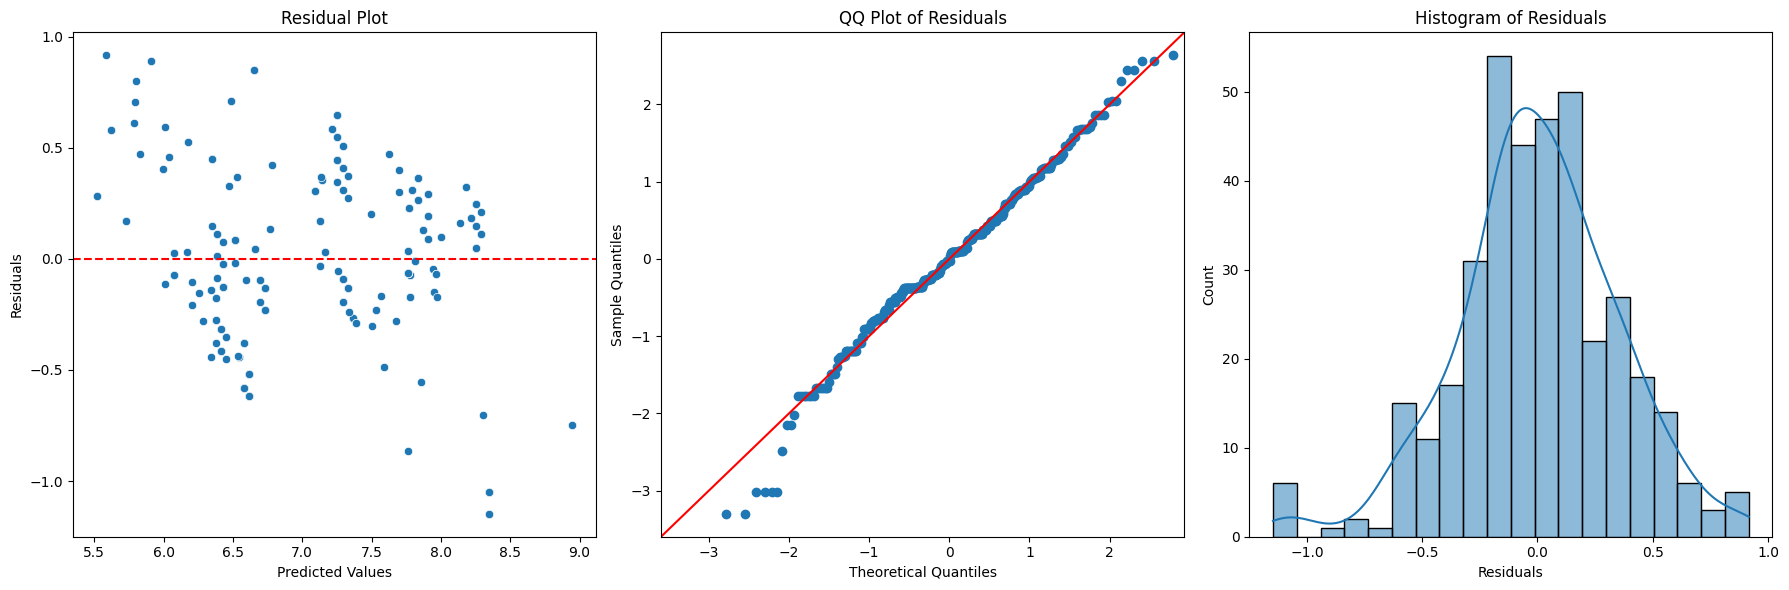

In [ ]:
# Predictions and residuals
y_pred = model_final.predict(X_final_const)
residuals = y - y_pred

# Create a figure and add subplots individually to avoid blank plot issues
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Residual Plot
sns.scatterplot(x=y_pred, y=residuals, ax=axs[0])
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residual Plot')

# QQ Plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[1])
axs[1].set_title('QQ Plot of Residuals')

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axs[2])
axs[2].set_xlabel('Residuals')
axs[2].set_title('Histogram of Residuals')

plt.tight_layout()
plt.show()

##### **Insights:**

**1. Residual Plot**

- **Interpretation:** The residual plot shows residuals (errors) on the y-axis versus predicted values on the x-axis. Ideally, residuals should be randomly scattered around zero without any discernible pattern, which suggests that the model has captured the linear relationships well and meets the assumption of homoscedasticity (constant variance).

- **Observation on the plot:** While the residuals are mostly centered around zero, there appears to be a slight pattern with residuals tending to fan out more as the predicted values increase. This indicates potential **mild heteroscedasticity**, meaning that the error variance might not be perfectly constant across all levels of predicted values. However, this pattern is relatively weak and might not significantly impact the model's performance.

**2. QQ Plot of Residuals**
- **Interpretation:** The QQ plot compares the distribution of the residuals to a theoretical normal distribution. If the residuals are normally distributed, they should closely follow the red line in the plot.
- **Observation on the plot:** The residuals largely follow the reference line, especially in the central part of the distribution. There are some minor deviations at the tails, with a few points departing from the line. This suggests that the residuals are approximately normally distributed but may exhibit slight skewness or kurtosis at the extremes. This slight deviation from normality is common in real-world data and generally acceptable if it is not severe.

**3. Histogram of Residuals**
- **Interpretation:** The histogram provides a more visual indication of the residual distribution's shape, showing whether residuals are symmetrically distributed around zero.

- **Observation on the plot:** The histogram shows a roughly normal, bell-shaped distribution centered around zero. The kernel density estimate (KDE) overlay confirms this shape, with a slight leftward skew, as indicated by a few outliers on the left side. The overall symmetry supports the approximate normality assumption, though the small skew may warrant caution if further model refinement is desired.